In [1]:
from segment_anything import SamPredictor, sam_model_registry
import os
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    #show the annotations with the largest area first
    m = sorted_anns[0]['segmentation']
    img = np.ones((m.shape[0], m.shape[1], 3))
    color_mask = np.random.random((1, 3)).tolist()[0]
    for i in range(3):
        img[:,:,i] = color_mask[i]
    ax.imshow(np.dstack((img, m*0.5)))
    

In [3]:
#get path to project root
root = os.getcwd()
root_to_model_weigths_path = 'sam_weights/sam_vit_h_4b8939.pth'
sam = sam_model_registry["default"](checkpoint=f"../{root_to_model_weigths_path}")
device = "cuda"
sam.to(device=device)
predictor = SamPredictor(sam)


In [4]:
image_path = '../databases/ODIR-5k/Testing Images/1312_left.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

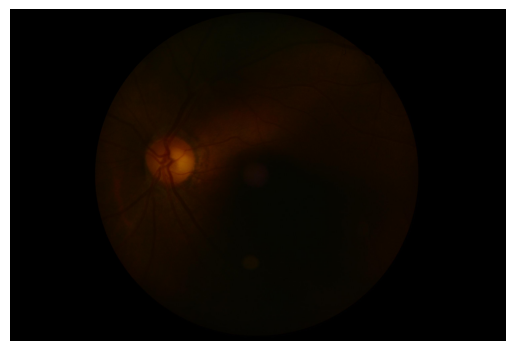

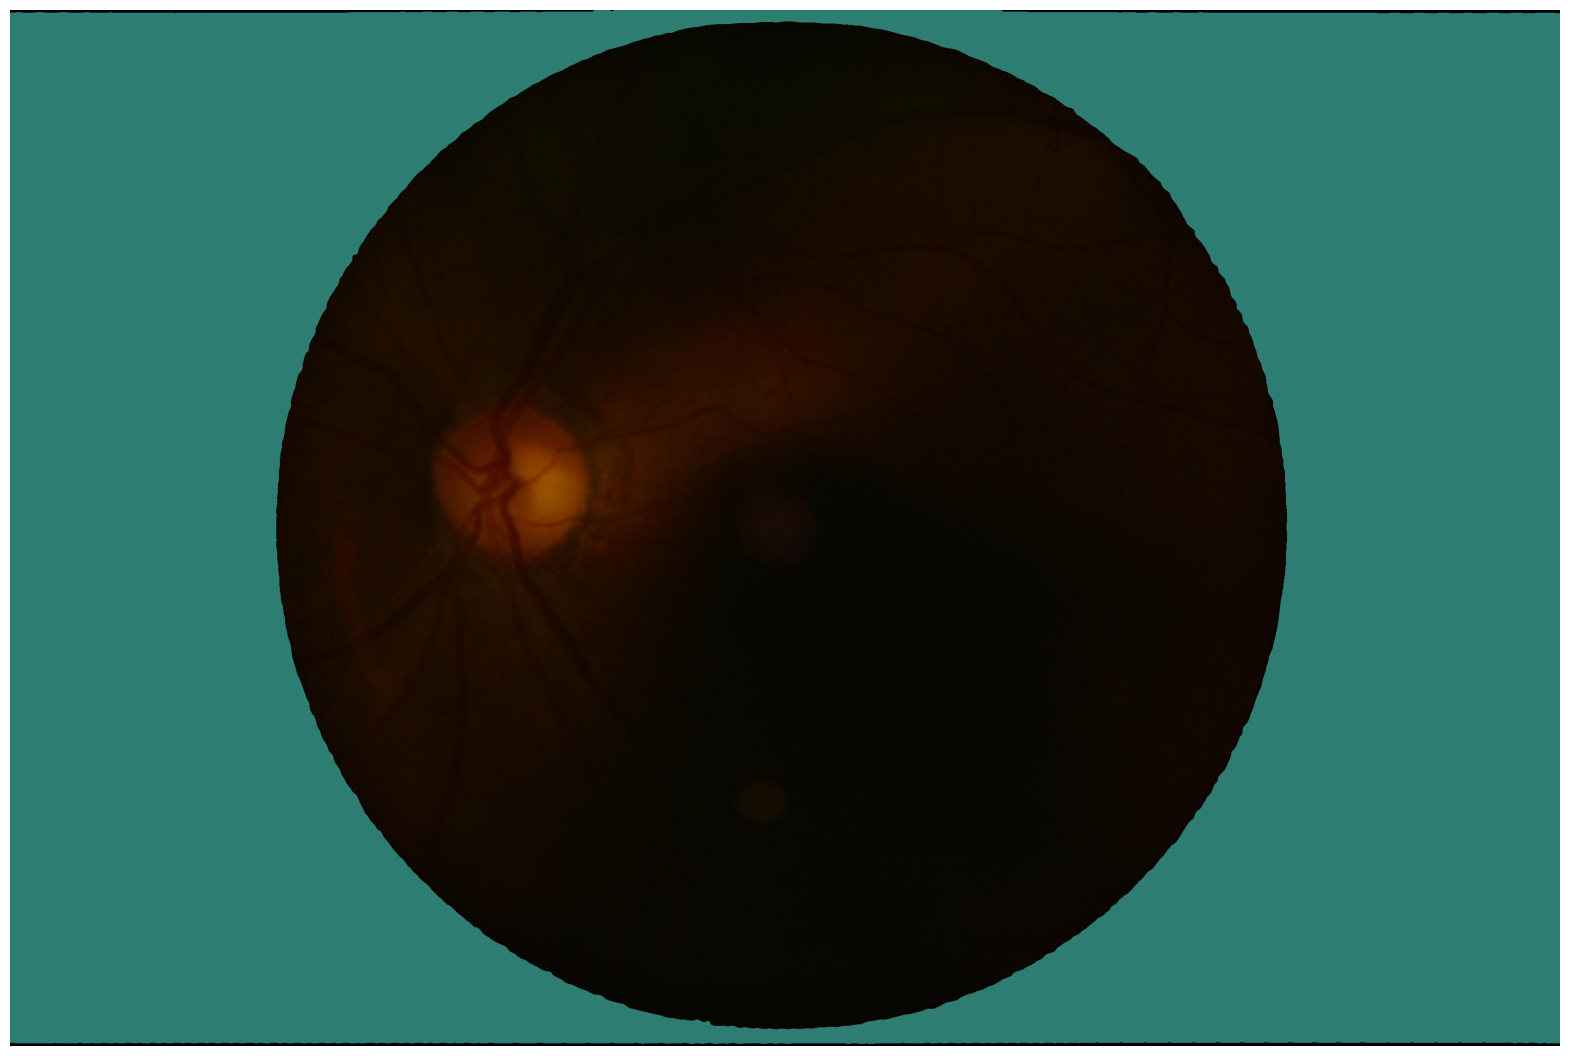

In [6]:
#show the original image and the generated masks
plt.imshow(image)
plt.axis('off')
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [6]:
predictor.set_image(<your_image>)
masks, _, _ = predictor.predict(<input_prompts>)

SyntaxError: invalid syntax (3686458094.py, line 1)

: 